# Random Forest
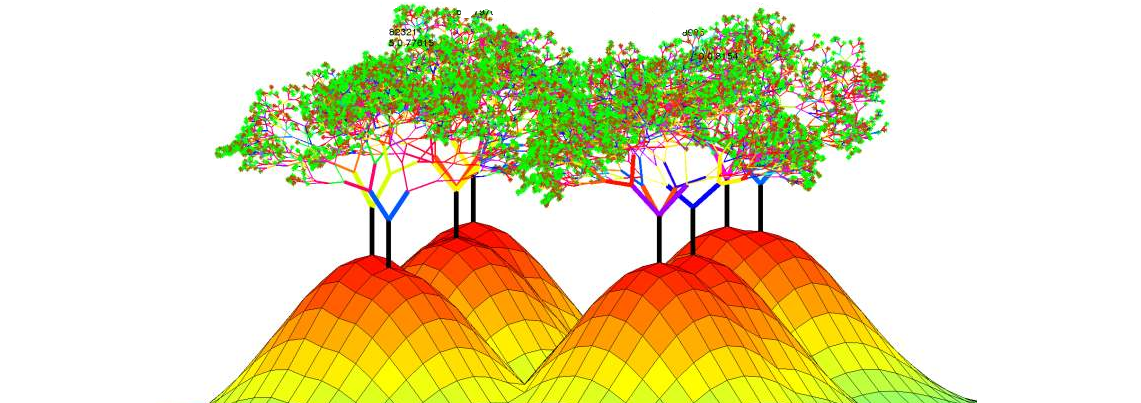

## Overview
**Random Forest** is a <span style="font-size: 11pt; color: goldenrod; font-weight: bold">Supervised Ensemble Learning technique</span> used in <span style="font-size: 11pt; color: steelblue; font-weight: bold">Machine Learning</span> for <u>both classification and regression tasks</u>. It's based on the concept of constructing multiple **Decision Trees (DT)** during training and then combining their outputs to improve accuracy and reduce overfitting. 

## Random Forests are known for:
- <span style="font-size: 11pt; color: seagreen; font-weight: bold">Interpretability</span>: The decision making process of Random Forests can be well interpreted by analyzing feature's impact on the splitting process, using visualization tools and more advanced methods like partial dependence plots and [SHAP](https://shap.readthedocs.io/en/latest/)
 values (SHapley Addictive exPlanation values, which provide a more detailed breakdown of each feature's contribution to a specific prediction). This property is highly appreciated by stakeholders and is highly valued in negotiation processess. 
   - Random Forests consist of multiple trees. Visualizing the entirety of a Random Forest can be complex due to the ensemble structure. However, you can still visualize individual decision trees to gain insights into how the model is making predictions for specific instances.
- <span style="font-size: 11pt; color: seagreen; font-weight: bold">Versatility</span>: Random Forests exhibit versatility due to their ability to handle both classification and regression tasks effectively. This is achieved by aggregating the predictions of multiple decision trees. Each tree can provide insights into different aspects of the data, and the ensemble combines these diverse perspectives to make accurate predictions.
- <span style="font-size: 11pt; color: seagreen; font-weight: bold">Robustness</span>: Random Forests are robust against noise and outliers in the data. The inherent randomness in constructing decision trees helps mitigate the impact of individual noisy or outlier-prone instances. When combining the predictions of many trees, the impact of such instances is often dampened, resulting in a more stable and reliable model.
    - Moreover, by aggregating predictions from multiple trees, overfitting is significantly reduced. Each tree might overfit to different parts of the data, but the ensemble's final decision is more likely to generalize well on unseen data, leading to a robust overall performance.
- <span style="font-size: 11pt; color: seagreen; font-weight: bold">Ability to handle large datasets</span>:
    - <u>Parallelization</u>: The construction of individual decision trees in a Random Forest can be done in parallel. This parallelization takes advantage of modern multi-core processors, significantly reducing the training time and making the model scalable to large datasets.
    - <u>Feature Selection</u>: In each split of a decision tree, only a random subset of features is considered. This feature randomness ensures that even if the dataset has a high number of features, the model doesn't become overly complex, thereby preventing overfitting.
    - <u>Subsampling</u>: The technique of bootstrapping involves random sampling with replacement to create multiple datasets for training. This technique allows Random Forests to handle large datasets by training each tree on a different subset of the data, which can be computationally more feasible.
    - <u>Generalization</u>: Random Forests excel in generalization, meaning they can learn from large datasets and still make accurate predictions on new, unseen data. The diversity among individual trees helps prevent memorization of the training data, leading to better performance on previously unseen instances.

***
The concept of ensemble learning dates back to the 1990s, but the term "Random Forest" was coined by **Leo Breiman** and **Adele Cutler** in **2001**. They aimed to address the limitations of individual decision trees by introducing randomness in the tree-building process.
***

## Key Ideas:
1. **Bootstrap Aggregating (Bagging):** Random Forests use a technique called bagging, where multiple datasets are created from the original data by randomly sampling with replacement. This introduces diversity among the trees.
2. **Feature Randomness:** In each split of a decision tree, only a random subset of features is considered. This prevents individual trees from being overly correlated.
3. **Voting (Classification):** For classification tasks, the mode (most frequent class) of the predictions from individual trees is taken as the final prediction. 
4.  **Averaging (Regression):** For regression tasks, the average of the individual tree predictions is used.

## Tips and Tricks
- **Number of Trees:** Increasing the number of trees improves performance up to a point. However, adding too many trees might lead to diminishing returns.
- **Feature Selection:** Use feature importance scores to identify and focus on the most relevant features.
- **Fine - Tune Hyperparameters:** Random Forests have a substantial amount of hyperparameters to tune, which can drastically change the effectiveness of predictions.
- **Out-of-bag validation:** Out-of-bag samples, unused during training, can serve as a validation set for each tree.
- **Handling NaN values:** Random Forests can handle missing values in the dataset.

## Hyperparameters fine - tuning:
Due to the sheer number of possible hyperparameters to tune in Random Forest models, additional techniques like Randomized Search, Grid Search or some other  methods to effectively search hyperparameter space should be employed:
- **Randomized Search:** During the Randomized Search, we define the hyperparameter space for an algorithm to seach in. During training, predefined number of models are constructed by choosing the random combinations of hyperparameter values, defined by the user.
- **Grid Search:** During the Grid Search, we define the hyperparameter space for an algorithm to perform exhaustive search in. During training, algorithm will run until it tries every possible hyperparameter combination in the defince search space.
- **Optuna:** Optuna is a leading framework for optimal hyperparameter search in the predifined space. It allows us to find the most efficient combination of hyperparameters in optimal amount of time.
- **Other Frameworks:** There exist a number of other frameworks which could help us optimize the process of hyperparameter tuning for our ML models.

## Usage examples:
Random Forests are used extensively in various domains, such as, but not limited to:
- **Medical Diagnosis:** Identifying diseases based on medical data.
- **Finance:** Predicting stock prices or credit risk assessment.
- **Ecology:** Species classification based on environmental variables.
- **Marketing:** Customer segmentation and prediction of customer preferences.

# RandomForest Regressor example code

### Model

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Define the random state for reproducibility
RANDOM_STATE = 42

# Extend the parameter dictionary
param_dict = {
    'n_estimators':      [int(x) for x in np.linspace(50, 350, 61)],
    'max_depth':         [int(x) for x in np.linspace(3, 20, 18)],
    'min_samples_split': [int(x) for x in np.linspace(2, 20, 19)],
    'min_samples_leaf':  [int(x) for x in np.linspace(1, 10, 10)],
    'criterion':         ['mse', 'mae'],
    'max_features':      ['auto', 'sqrt', 'log2'],
    'bootstrap':         [True, False], 
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2] 
}

# Add prefix to parameter names for the pipeline
param_dict_pipe = {'model__' + key: value for key, value in param_dict.items()}

# Create a pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('model', RandomForestRegressor(random_state=RANDOM_STATE,
                                                           verbose=3))],
                    verbose=True)

# Set up RandomizedSearchCV
rs_cv_rf = RandomizedSearchCV(estimator=pipeline,
                              param_distributions=param_dict_pipe,
                              n_iter=100, 
                              cv=5, 
                              verbose=2,
                              n_jobs=-1,
                              scoring='neg_mean_absolute_error',
                              random_state=RANDOM_STATE)

# Fit the RandomizedSearchCV
rs_cv_rf.fit(x_train, y_train)
